# Sales

**Data Description:** The provided data appears to be a dataset with four columns: TV, Radio, Newspaper, and Sales. Here's a description of each column:

**TV:** This column represents the advertising budget spent on TV for promoting a product or service.
**Radio:** This column represents the advertising budget spent on radio for promoting a product or service.
**Newspaper:** This column represents the advertising budget spent on newspaper advertisements for promoting a product or service.
**Sales:** This column represents the corresponding sales figures, likely influenced by the advertising budgets spent on TV, radio, and newspaper.

Each row in the dataset seems to correspond to a different instance or observation, possibly representing different products or different time periods.

This dataset could be used for analyzing the relationship between advertising spending across different mediums (TV, radio, newspaper) and the resulting sales figures, which could help in making decisions about future advertising strategies.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('advertising.csv')

In [2]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [8]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [9]:
from sklearn.ensemble import RandomForestRegressor
X = data.drop(columns=['Sales'])
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

#Model Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.4374328500000009


In [11]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Root Mean Squared Error
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.9179999999999993
Root Mean Squared Error: 1.1989298770153327


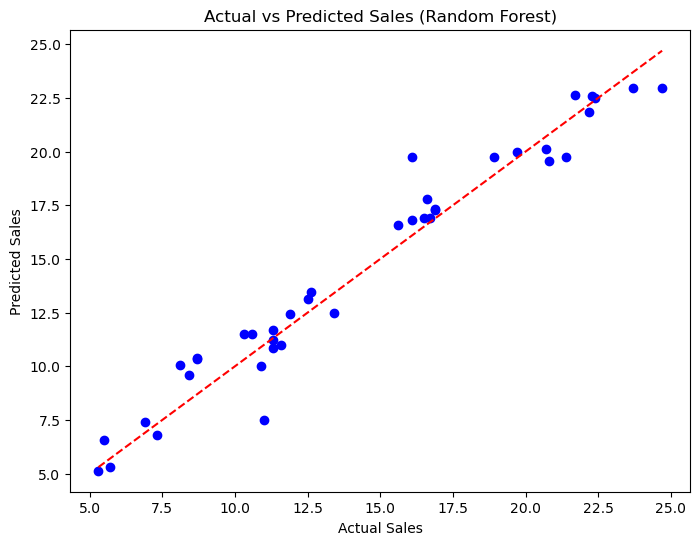

In [12]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted sales values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.show()


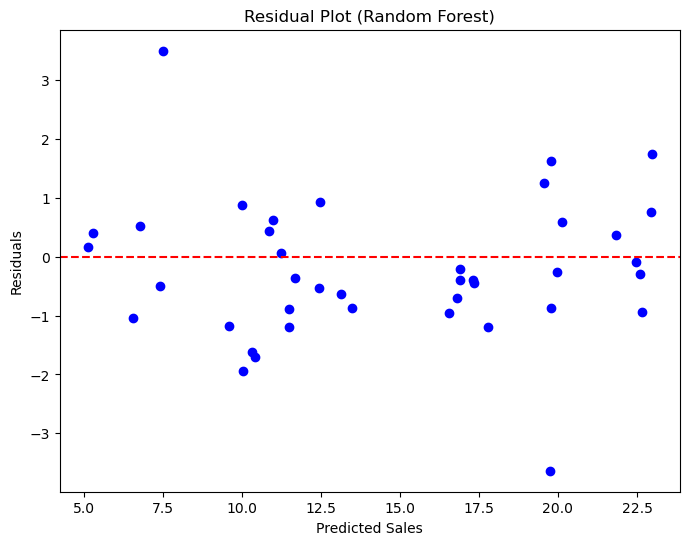

In [13]:
# Calculate residuals
residuals = y_test - predictions

# Plotting residual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()

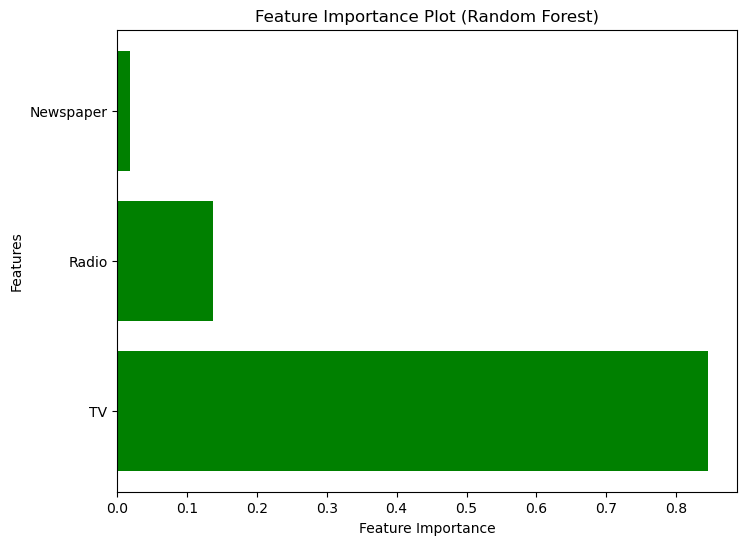

In [14]:
# Get feature importances
feature_importances = model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importances, color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (Random Forest)')
plt.show()


**Mean Squared Error (MSE):** The RandomForestRegressor model achieved an MSE of approximately 1.4374. MSE measures the average squared difference between the actual and predicted sales values. A lower MSE indicates better model performance in terms of prediction accuracy.

**Mean Absolute Error (MAE):** The MAE for the RandomForestRegressor model is approximately 0.918. MAE represents the average absolute difference between the actual and predicted sales values. A lower MAE suggests better accuracy in predicting sales values.

**Root Mean Squared Error (RMSE):** The RMSE for the RandomForestRegressor model is approximately 1.1989. RMSE is the square root of the MSE and provides a measure of the average magnitude of errors in the predictions on the original scale of the target variable. A lower RMSE indicates better model performance.

**Actual vs Predicted Sales (Random Forest) :** On the scatter plot it appears the actual sales are consistently higher than the predicted sales for a Random Forest model.

**Residual Plot (Random Forest):** The residual plot it generates,the actual sales are consistently higher than the predicted sales for a Random Forest model

**Feature Importance Plot (Random Forest):** A feature importance plot for a random forest model, the newspaper is the most important feature for predicting the target variable. The radio and TV have the least importance

**Recommendations

**Determine Advertising Effectiveness:

Conduct an analysis to assess the effectiveness of each advertising channel (TV, Radio, Newspaper) in driving sales. Allocate marketing budgets based on the return on investment (ROI) of each channel. Consider reallocating resources from less effective channels to more profitable ones.

**Focus on High-Impact Channels:

Identify which advertising channels have the highest impact on sales and prioritize investments in those channels. For example, if TV advertising consistently leads to higher sales compared to Radio and Newspaper, consider allocating a larger portion of the budget to TV advertising.

**Explore Digital Marketing Opportunities:

Explore opportunities in digital marketing, such as online advertising, social media marketing, and influencer partnerships. Digital channels often offer targeted advertising options and precise audience segmentation, allowing for more efficient spending and better engagement with the target audience.

**Optimize Ad Creative and Messaging:

Experiment with different ad creatives, messaging, and calls-to-action to determine which resonates most with the target audience. A/B testing can help identify the most effective ad variations and refine marketing strategies accordingly.